<a href="https://colab.research.google.com/github/nileshgarg12/SHALA2020-/blob/master/Assignment_ML_L4_LinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression(SGD)**



---
Importing the required packages


---



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random



---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [0]:
housing_data = california_housing.fetch_california_housing()

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [0]:
df = df[df.Target < 5]      #removing outliers

In [0]:

X = df["MedInc"]
y = df.Target.values.reshape(-1,1)
X = X.values.reshape(-1,1)
ones = np.ones(len(X)).reshape(-1,1)
X1 = np.append(ones,X,axis=1)     #adding bias column to X matrix

X1.shape

(19648, 2)

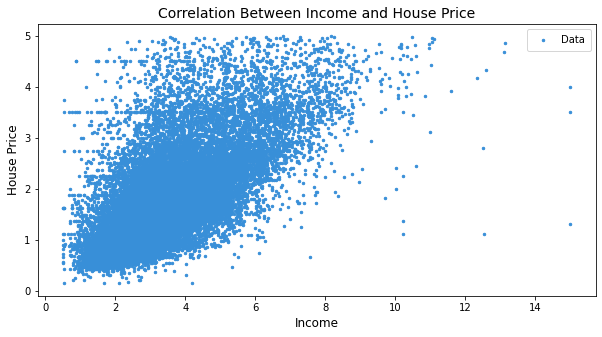

In [0]:
#plotting scatter plot of data and target variablr
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):

     n = len(X)                               # no. of training ex.         
     w = np.array([[0.1],[0.1]])              #initialising w
     mse = []   
     k = batch_size
     for i in range(epochs):
            idx = range(len(X))               #Complete indexes
            indx = random.choices(idx,k=k)    #randomly taking k training points with replacement
            Xs = X[indx];ys= y[indx]          
            y_pred = np.matmul(Xs,w)          
            err = y_pred-ys                   # error of y_pred and acutual y
            Xt = np.transpose(Xs)
            grad = np.matmul(Xt,err)
            w -= 2*(lr*grad)/k                # updating rule of w

            mse.append(mean_squared_error(y,np.dot(X,w)))   # appending mse values to plot later wrt epochs
     return w[1], w[0], mse

In [0]:

m, b, mse = SGD(X1, y, lr=0.01, epochs=100, batch_size=2)   # appling SGD with given parameters
print(m)
print(b)

[0.43394996]
[0.27903081]


Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

MSE: 0.5535906142113299


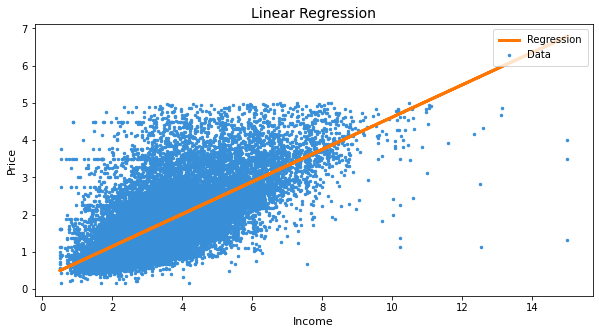

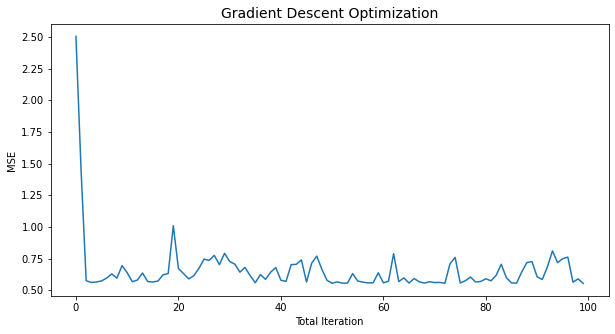

In [0]:
y_pred = m*X + b        #final predicted y

#plotting scatter plot and line predicted using SGD
print("MSE:",mean_squared_error(y, y_pred))
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

# plotting mse wrt epochs, it shows that as epochs increases mse decreases so SGD is converging
plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Total Iteration')
plt.ylabel('MSE')
plt.show()


################################################
###########write your code#####################
###############################################